In [ ]:
import pandas as pd
import numpy as numpy

In [ ]:
import os
a = os.getcwd()
print(a)

/content/drive/Shareddrives/Praxis_Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


In [ ]:
import os

os.chdir("/content/drive/Shared drives/Praxis_Analysis")

In [ ]:
ls

Base_Models.ipynb    Final_Clean_Data.csv  Nazario.csv     SpamAssasin.csv     TREC_07.csv
Data_Analysis.ipynb  Final_Data.csv        Nazario.gsheet  SpamAssasin.gsheet  TREC_07.gsheet


In [ ]:
df = pd.read_csv("Final_Clean_Data.csv")

In [ ]:
df.head()

,Unnamed: 0,label,email_content
0,0,phishing,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL D...
1,1,phishing,Verify Your Account Business with \t\t\t\t\t\...
2,2,phishing,Helpdesk Mailbox Alert!!! Your two incoming ma...
3,3,phishing,IT-Service Help Desk Password will expire in 3...
4,4,phishing,Final USAA Reminder - Update Your Account Now ...


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
!pip install stopwords
!pip install flair
!pip install nltk
!pip install swifter

In [ ]:
#import flair
#from flair.data import Sentence
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
pd.options.display.max_rows = None

In [ ]:
print(df.shape)
print(df.info())

(60661, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60661 entries, 0 to 60660
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          60661 non-null  object
 1   email_content  60661 non-null  object
dtypes: object(2)
memory usage: 948.0+ KB
None


In [ ]:
df.email_content = df.email_content.astype('str')

In [ ]:
df.label.value_counts()

phishing    32217
spam        28444
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

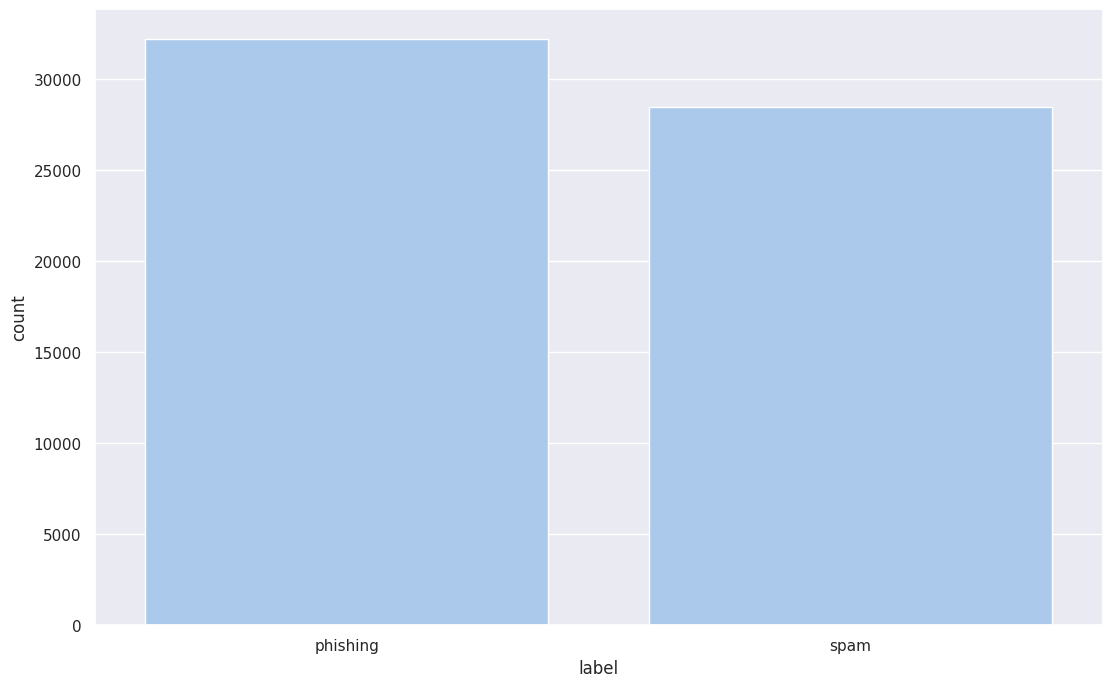

In [ ]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x="label",data=df)

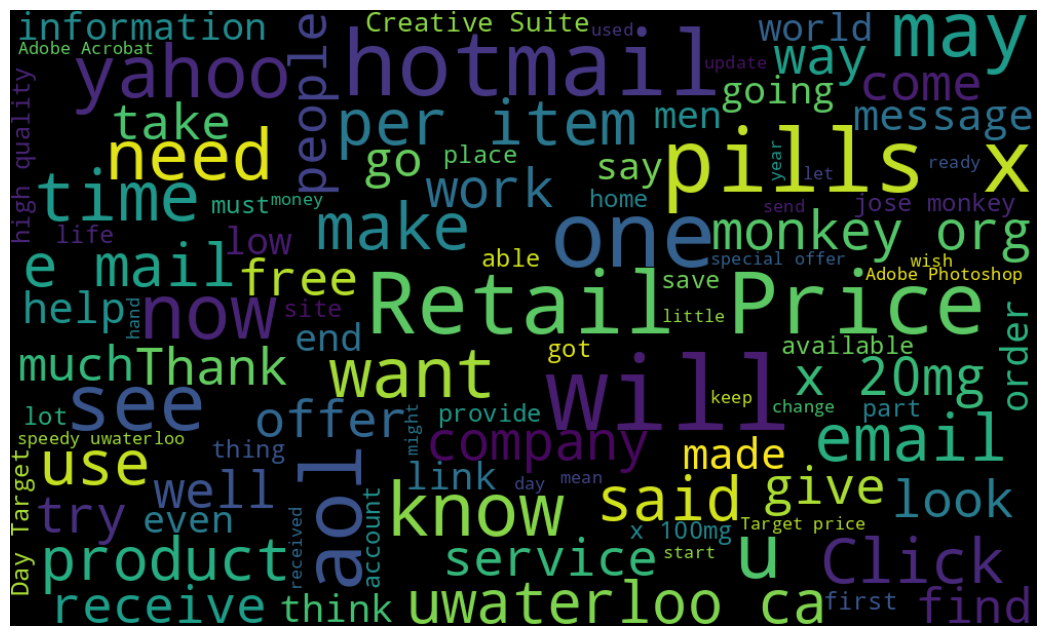

In [ ]:
txt = ' '.join(word for word in df[df['label']=='phishing'].email_content)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(background_color = 'black',
                      max_font_size = 100,
                      max_words = 100,
                      width = 1000,
                      height = 600
                      ).generate(txt)

plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis('off')
plt.show()
# For phishing emails, the wordcloud below shows us the top 100 most recurring words that are used in such emails

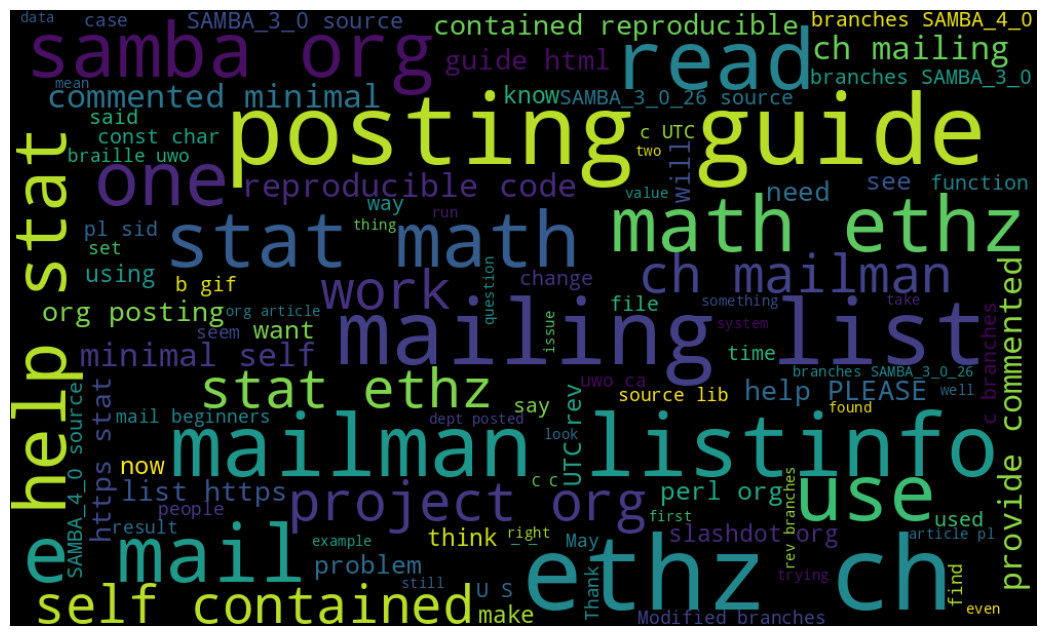

In [ ]:
txt = ' '.join(word for word in df[df['label']=='spam'].email_content)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(background_color = 'black',
                      max_font_size = 100,
                      max_words = 100,
                      width = 1000,
                      height = 600
                      ).generate(txt)

plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis('off')
plt.show()
# For spam emails, the wordcloud below shows us the top 100 most recurring words that are used in such emails

In [ ]:
# Data Cleaning
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.isnull().sum()

label            0
email_content    0
dtype: int64

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.shape

(60661, 2)

In [ ]:
def clean(raw):
  """ Remove hyperlinks and markup """
  result = re.sub("<[a][^>]*>(.+/)</[a]>", 'Link.',raw)
  result = re.sub('&gt;',"",result)
  result = re.sub('&#x27;',"'",result)
  result = re.sub('&quot;','"',result)
  result = re.sub('&#x2F;',' ',result)
  result = re.sub('<p>',' ',result)
  result = re.sub('</i','',result)
  result = re.sub('&#62;','',result)
  result = re.sub('<i>',' ',result)
  result = re.sub("\n",'',result)
  return result

In [ ]:
def remove_num(texts):
  output = re.sub(r'\d+','',texts)
  return output

In [ ]:
def deEmojify(x):
  regrex_pattern = re.compile(pattern = "["
  u"\U0001F600-\U0001F64F"
  u"\U0001F300-\U0001F5FF"
  u"\U0001F680-\U0001F6FF"
  u"\U0001F1E0-\U0001F1FF"
  "]+", flags = re.UNICODE)
  return regrex_pattern.sub(r'',x)

In [ ]:
def remove_symbols(x):
  cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+",' ',x)
  return cleaned_string

In [ ]:
def unify_whitespaces(x):
  cleaned_string = re.sub(' +',' ',x)
  return cleaned_string

In [ ]:
def remove_punctuation(text):
  final = "".join(u for u in text if u not in ("?",".",";",":","!",'"',","))
  return final

In [ ]:
stop = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

In [ ]:
def remove_stopword(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(text)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
  stem = []
  stopword = stopwords.words('english')
  snowball_stemmer = SnowballStemmer('english')
  word_tokens = nltk.word_tokenize(text)
  stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
  stem = " ".join(stemmed_word)
  return stem

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def cleaning(df, review):
  df[review] = df[review].apply(clean)
  df[review] = df[review].apply(deEmojify)
  df[review] = df[review].str.lower()
  df[review] = df[review].apply(remove_num)
  df[review] = df[review].apply(remove_symbols)
  df[review] = df[review].apply(remove_punctuation)
  df[review] = df[review].apply(remove_stopword)
  df[review] = df[review].apply(unify_whitespaces)
  df[review] = df[review].apply(Stemming)

In [ ]:
cleaning(df,'email_content')

In [ ]:
# Random Forest Classifier as our modeling algorithm
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english",max_features=5000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])





In [ ]:
df.label = df.label.replace({'phishing':1,'spam':0})

X = df['email_content']
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20)
text_classifier = clf.fit(X_train,y_train)
predictions = text_classifier.predict(X_test)



In [ ]:
# Model performance
# confusion  matrix - Diagonal elements tell you the correct number of predictions.
# The first element tells you the number of emails that were not phishing and were not identified as phishing -indicating correct prediction
# The second element tells you the number of emails that were actually phishing and the model identified them as phishing. indicating correct prediction

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score
confusion_matrix(y_test,predictions)

array([[5675,  107],
       [  53, 6298]])

In [ ]:
# Model performance - Accuracy can be used as a model evaluation since the dataset is balanced.
def results(y_test,y_pred):

  print('Classification Report: \n',classification_report(y_test,predictions,labels=[1,0]))
  print("F1-Score: {}".format(f1_score(y_test,y_pred,average="macro")))
  print("ROC-AUC {}".format(roc_auc_score(y_test,y_pred)))
results(y_test,predictions)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.99      0.99      6351
           0       0.99      0.98      0.99      5782

    accuracy                           0.99     12133
   macro avg       0.99      0.99      0.99     12133
weighted avg       0.99      0.99      0.99     12133

F1-Score: 0.9867779636723653
ROC-AUC 0.9865745750675312


In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
clf_log = Pipeline([
    ('vect', CountVectorizer(stop_words= "english",max_features=5000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression()),
    ])

#df.label = df.label.replace({'phishing':1,'spam':0})

X = df['email_content']
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20)
text_classifier = clf_log.fit(X_train,y_train)
predictions = text_classifier.predict(X_test)

# Model performance
# confusion  matrix - Diagonal elements tell you the correct number of predictions.
# The first element tells you the number of emails that were not phishing and were not identified as phishing -indicating correct prediction
# The second element tells you the number of emails that were actually phishing and the model identified them as phishing. indicating correct prediction

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score
confusion_matrix(y_test,predictions)

# Model performance - Accuracy can be used as a model evaluation since the dataset is balanced.
def results(y_test,y_pred):

  print('Classification Report: \n',classification_report(y_test,predictions,labels=[1,0]))
  print("F1-Score: {}".format(f1_score(y_test,y_pred,average="macro")))
  print("ROC-AUC {}".format(roc_auc_score(y_test,y_pred)))
results(y_test,predictions)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.99      0.99      6351
           0       0.99      0.98      0.98      5782

    accuracy                           0.99     12133
   macro avg       0.99      0.99      0.99     12133
weighted avg       0.99      0.99      0.99     12133

F1-Score: 0.9853749616291607
ROC-AUC 0.9852284556489306
